# Stock price predictor


## Fetch the Data


   **Step 1 :** Function to get historical data from yahoo finance

In [1]:
import pandas as pd
import yfinance as yf
def get_stock_data(stock_code, period):
    alphabet = yf.Ticker(stock_code)
    col_names = ['Date','Open','High','Low','Close','Volume']
    #df = pd.DataFrame(yf.download("GOOG",start = "2005-01-01",end = "2017-06-30"))
    df = pd.DataFrame(alphabet.history(period='12y'))
    df = df.filter(col_names)
    return df

 **Step 2:** get the stock data of desired firm from [Yahoo Finance](https://in.finance.yahoo.com/).

In [2]:
data = get_stock_data('GOOG','12y') #Last 12 years
print(data)

                   Open         High          Low        Close   Volume
Date                                                                   
2009-06-03   212.204605   215.422546   211.208344   215.019058  7092084
2009-06-04   216.837234   219.796143   216.438736   219.317947  7303473
2009-06-05   221.703995   222.834763   218.909470   221.330399  7389193
2009-06-08   218.929398   219.636749   216.249451   218.565765  6220629
2009-06-09   218.471115   219.427536   215.073853   216.996643  6534200
...                 ...          ...          ...          ...      ...
2021-05-26  2412.834961  2442.944092  2412.514893  2433.530029  1092800
2021-05-27  2436.939941  2440.000000  2402.000000  2402.510010  1948100
2021-05-28  2421.959961  2428.139893  2407.689941  2411.560059  1205400
2021-06-01  2422.000000  2437.970947  2404.879883  2429.810059   957900
2021-06-02  2435.310059  2442.000000  2404.199951  2421.280029   850390

[3021 rows x 5 columns]


**Step 3:** Write the data to a csv file.

In [3]:
#data.to_csv('google.csv',index = False)

# Check Point #1

This is our first checkpoint. The data has been saved to disk.

## Preprocess the data

Now it is time to preprocess the data. In the following cells we will normalise it for better prediction of data.

**Step 1 :** Get the data from csv file.

In [4]:
import pandas as pd
import numpy as np
print(data.head())

print("\n")
print("Open   --- mean :", np.mean(data['Open']),  "  \t Std: ", np.std(data['Open']),  "  \t Max: ", np.max(data['Open']),  "  \t Min: ", np.min(data['Open']))
print("High   --- mean :", np.mean(data['High']),  "  \t Std: ", np.std(data['High']),  "  \t Max: ", np.max(data['High']),  "  \t Min: ", np.min(data['High']))
print("Low    --- mean :", np.mean(data['Low']),   "  \t Std: ", np.std(data['Low']),   "  \t Max: ", np.max(data['Low']),   "  \t Min: ", np.min(data['Low']))
print("Close  --- mean :", np.mean(data['Close']), "  \t Std: ", np.std(data['Close']), "  \t Max: ", np.max(data['Close']), "  \t Min: ", np.min(data['Close']))
print("Volume --- mean :", np.mean(data['Volume']),"  \t Std: ", np.std(data['Volume']),"  \t Max: ", np.max(data['Volume']),"  \t Min: ", np.min(data['Volume']))


                  Open        High         Low       Close   Volume
Date                                                               
2009-06-03  212.204605  215.422546  211.208344  215.019058  7092084
2009-06-04  216.837234  219.796143  216.438736  219.317947  7303473
2009-06-05  221.703995  222.834763  218.909470  221.330399  7389193
2009-06-08  218.929398  219.636749  216.249451  218.565765  6220629
2009-06-09  218.471115  219.427536  215.073853  216.996643  6534200


Open   --- mean : 745.3446613199385   	 Std:  472.50326010917513   	 Max:  2436.93994140625   	 Min:  199.25314331054688
High   --- mean : 752.3901212528738   	 Std:  477.9835179728052   	 Max:  2452.3779296875   	 Min:  202.241943359375
Low    --- mean : 738.4817921481595   	 Std:  468.03376904860556   	 Max:  2412.514892578125   	 Min:  197.2506561279297
Close  --- mean : 745.6706861125361   	 Std:  473.1991433928771   	 Max:  2433.530029296875   	 Min:  197.57444763183594
Volume --- mean : 3222796.6226415094   	 S

**Step 2 :** Remove data that is no longer required i.e Date and High value

In [5]:
import data_preprocess as dpp
stocks = dpp.delete_data(data)

#Print the dataframe head and tail
print(stocks.head())
print("---")
print(stocks.tail())

   Item        Open       Close   Volume
0     0  212.204605  215.019058  7092084
1     1  216.837234  219.317947  7303473
2     2  221.703995  221.330399  7389193
3     3  218.929398  218.565765  6220629
4     4  218.471115  216.996643  6534200
---
      Item         Open        Close   Volume
3016  3016  2412.834961  2433.530029  1092800
3017  3017  2436.939941  2402.510010  1948100
3018  3018  2421.959961  2411.560059  1205400
3019  3019  2422.000000  2429.810059   957900
3020  3020  2435.310059  2421.280029   850390


**Step 2: ** Visualise raw data.

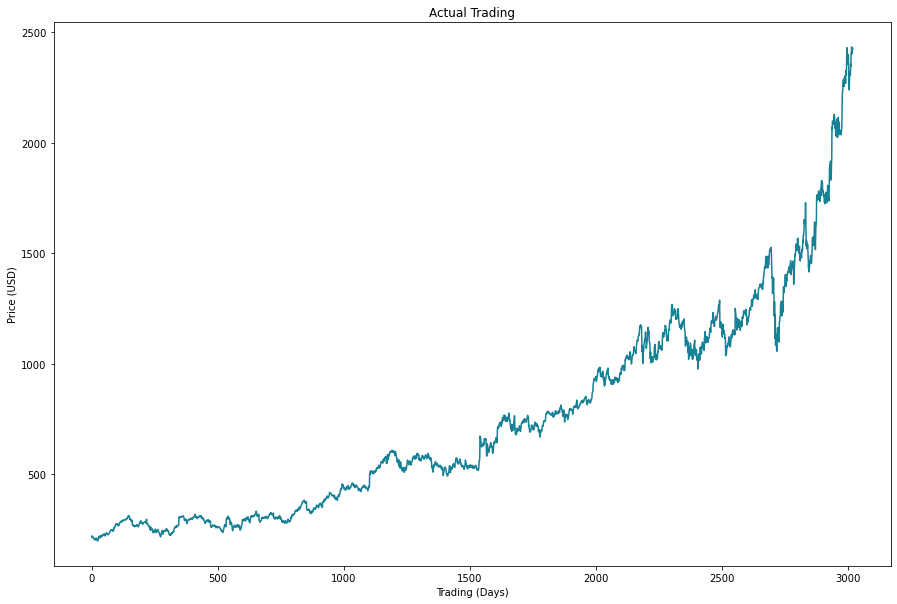

In [6]:
import plots

plots.basic_plot(stocks)

**Step 3 :** Normalise the data using different scalar function

In [7]:
import copy
Stocks1=copy.copy(stocks)
Stocks1 = dpp.get_normalised_data_StandardScalar(Stocks1)
print(Stocks1.head())
print("\n")
print("Open   --- mean :", np.mean(Stocks1['Open']),  "  \t Std: ", np.std(Stocks1['Open']),  "  \t Max: ", np.max(Stocks1['Open']),  "  \t Min: ", np.min(Stocks1['Open']))
print("Close  --- mean :", np.mean(Stocks1['Close']), "  \t Std: ", np.std(Stocks1['Close']), "  \t Max: ", np.max(Stocks1['Close']), "  \t Min: ", np.min(Stocks1['Close']))
print("Volume --- mean :", np.mean(Stocks1['Volume']),"  \t Std: ", np.std(Stocks1['Volume']),"  \t Max: ", np.max(Stocks1['Volume']),"  \t Min: ", np.min(Stocks1['Volume']))
print("\n\n")
Stocks2=copy.copy(Stocks1)


Stocks3=copy.copy(Stocks2)
Stocks3 = dpp.get_normalised_data_MaxAbsScaler(Stocks3)
print(Stocks3.head())
print("\n")
print("Open   --- mean :", np.mean(Stocks3['Open']),  "  \t Std: ", np.std(Stocks3['Open']),  "  \t Max: ", np.max(Stocks3['Open']),  "  \t Min: ", np.min(Stocks3['Open']))
print("Close  --- mean :", np.mean(Stocks3['Close']), "  \t Std: ", np.std(Stocks3['Close']), "  \t Max: ", np.max(Stocks3['Close']), "  \t Min: ", np.min(Stocks3['Close']))
print("Volume --- mean :", np.mean(Stocks3['Volume']),"  \t Std: ", np.std(Stocks3['Volume']),"  \t Max: ", np.max(Stocks3['Volume']),"  \t Min: ", np.min(Stocks3['Volume']))
print("\n\n")
Stocks4=copy.copy(Stocks3)
Stocks4 = dpp.get_normalised_data_RobustScaler(Stocks4)
print(Stocks4.head())
print("\n")
print("Open   --- mean :", np.mean(Stocks4['Open']),  "  \t Std: ", np.std(Stocks4['Open']),  "  \t Max: ", np.max(Stocks4['Open']),  "  \t Min: ", np.min(Stocks4['Open']))
print("Close  --- mean :", np.mean(Stocks4['Close']), "  \t Std: ", np.std(Stocks4['Close']), "  \t Max: ", np.max(Stocks4['Close']), "  \t Min: ", np.min(Stocks4['Close']))
print("Volume --- mean :", np.mean(Stocks4['Volume']),"  \t Std: ", np.std(Stocks4['Volume']),"  \t Max: ", np.max(Stocks4['Volume']),"  \t Min: ", np.min(Stocks4['Volume']))
print("\n\n")
Stocks5=copy.copy(Stocks4)
Stocks5 = dpp.get_normalised_data_Normalizer(Stocks5)
print(Stocks5.head())
print("\n")
print("Open   --- mean :", np.mean(Stocks5['Open']),  "  \t Std: ", np.std(Stocks5['Open']),  "  \t Max: ", np.max(Stocks5['Open']),  "  \t Min: ", np.min(Stocks5['Open']))
print("Close  --- mean :", np.mean(Stocks5['Close']), "  \t Std: ", np.std(Stocks5['Close']), "  \t Max: ", np.max(Stocks5['Close']), "  \t Min: ", np.min(Stocks5['Close']))
print("Volume --- mean :", np.mean(Stocks5['Volume']),"  \t Std: ", np.std(Stocks5['Volume']),"  \t Max: ", np.max(Stocks5['Volume']),"  \t Min: ", np.min(Stocks5['Volume']))
print("\n\n")
Stocks6=copy.copy(Stocks5)
Stocks6 = dpp.get_normalised_data_QuantileTransformer(Stocks6)
print(Stocks6.head())
print("\n")
print("Open   --- mean :", np.mean(Stocks6['Open']),  "  \t Std: ", np.std(Stocks6['Open']),  "  \t Max: ", np.max(Stocks6['Open']),  "  \t Min: ", np.min(Stocks6['Open']))
print("Close  --- mean :", np.mean(Stocks6['Close']), "  \t Std: ", np.std(Stocks6['Close']), "  \t Max: ", np.max(Stocks6['Close']), "  \t Min: ", np.min(Stocks6['Close']))
print("Volume --- mean :", np.mean(Stocks6['Volume']),"  \t Std: ", np.std(Stocks6['Volume']),"  \t Max: ", np.max(Stocks6['Volume']),"  \t Min: ", np.min(Stocks6['Volume']))
print("\n\n")
Stocks7=copy.copy(Stocks6)
Stocks7 = dpp.get_normalised_data_PowerTransformer(Stocks7)
print(Stocks7.head())
print("\n")
print("Open   --- mean :", np.mean(Stocks7['Open']),  "  \t Std: ", np.std(Stocks7['Open']),  "  \t Max: ", np.max(Stocks7['Open']),  "  \t Min: ", np.min(Stocks7['Open']))
print("Close  --- mean :", np.mean(Stocks7['Close']), "  \t Std: ", np.std(Stocks7['Close']), "  \t Max: ", np.max(Stocks7['Close']), "  \t Min: ", np.min(Stocks7['Close']))
print("Volume --- mean :", np.mean(Stocks7['Volume']),"  \t Std: ", np.std(Stocks7['Volume']),"  \t Max: ", np.max(Stocks7['Volume']),"  \t Min: ", np.min(Stocks7['Volume']))
print("\n\n")
stocks = dpp.normalize_data(stocks)
print(stocks.head())
print("\n")
print("Open   --- mean :", np.mean(stocks['Open']),  "  \t Std: ", np.std(stocks['Open']),  "  \t Max: ", np.max(stocks['Open']),  "  \t Min: ", np.min(stocks['Open']))
print("Close  --- mean :", np.mean(stocks['Close']), "  \t Std: ", np.std(stocks['Close']), "  \t Max: ", np.max(stocks['Close']), "  \t Min: ", np.min(stocks['Close']))
print("Volume --- mean :", np.mean(stocks['Volume']),"  \t Std: ", np.std(stocks['Volume']),"  \t Max: ", np.max(stocks['Volume']),"  \t Min: ", np.min(stocks['Volume']))


   Item      Open     Close    Volume
0     0 -1.128331 -1.121413  1.463062
1     1 -1.118527 -1.112328  1.542992
2     2 -1.108227 -1.108075  1.575405
3     3 -1.114099 -1.113918  1.133546
4     4 -1.115069 -1.117234  1.252114


Open   --- mean : 5.1597256755171126e-17   	 Std:  1.0000000000000009   	 Max:  3.58007112944672   	 Min:  -1.1557412701940164
Close  --- mean : -1.2234870882429895e-15   	 Std:  0.9999999999999996   	 Max:  3.566911239699733   	 Min:  -1.1582781713229757
Volume --- mean : 4.747388623670232e-16   	 Std:  1.000000000000001   	 Max:  10.0345709970995   	 Min:  -1.215613978921852



   Item      Open     Close    Volume
0     0 -0.315170 -0.314393  0.145802
1     1 -0.312431 -0.311846  0.153768
2     2 -0.309554 -0.310654  0.156998
3     3 -0.311195 -0.312292  0.112964
4     4 -0.311465 -0.313222  0.124780


Open   --- mean : 4.17555577814996e-16   	 Std:  0.2793240591715687   	 Max:  1.0   	 Min:  -0.3228263429426973
Close  --- mean : 6.486407277270445e-17   	 S

**Step 4 :** Visualize the data again

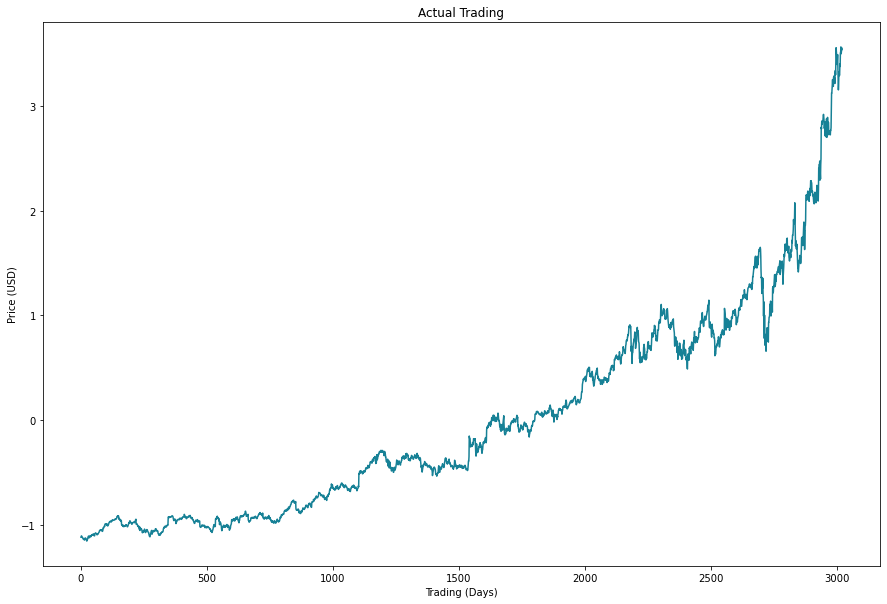

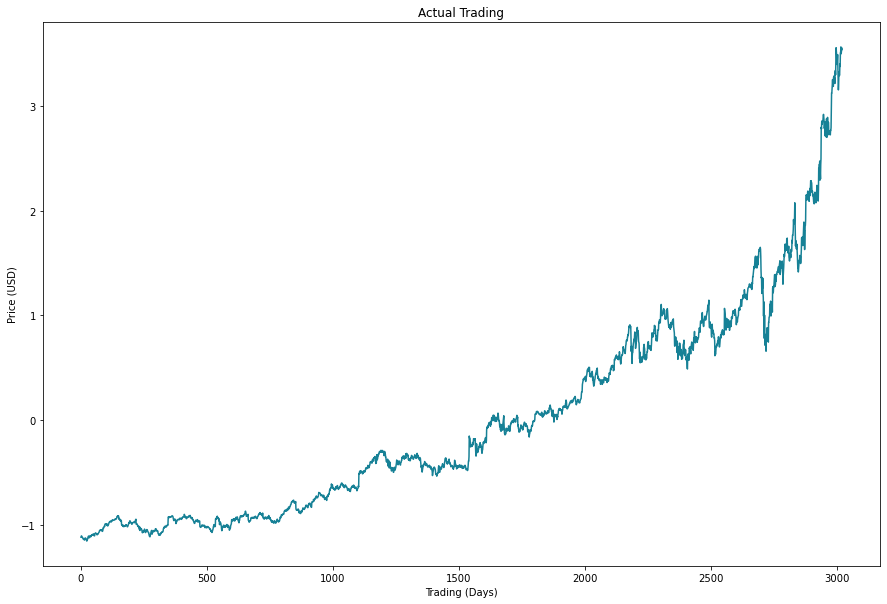

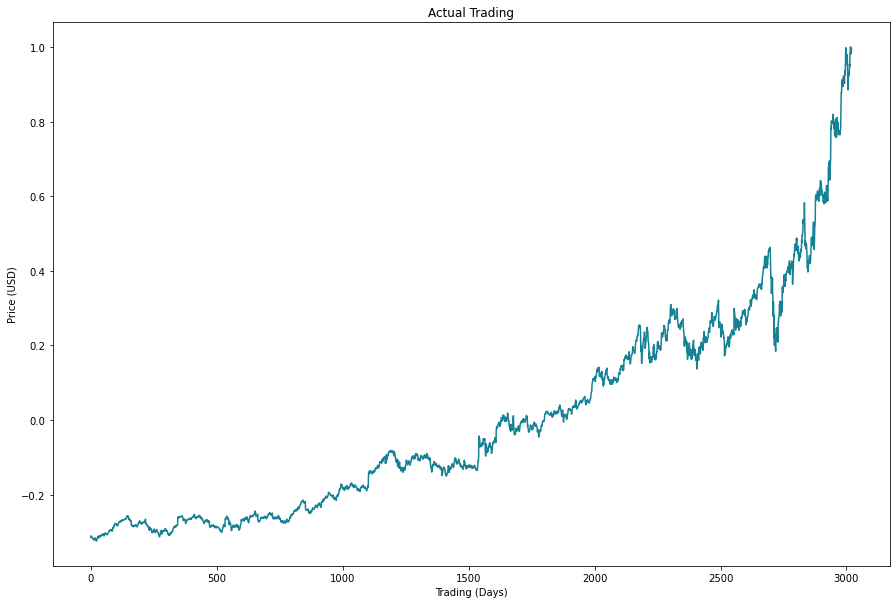

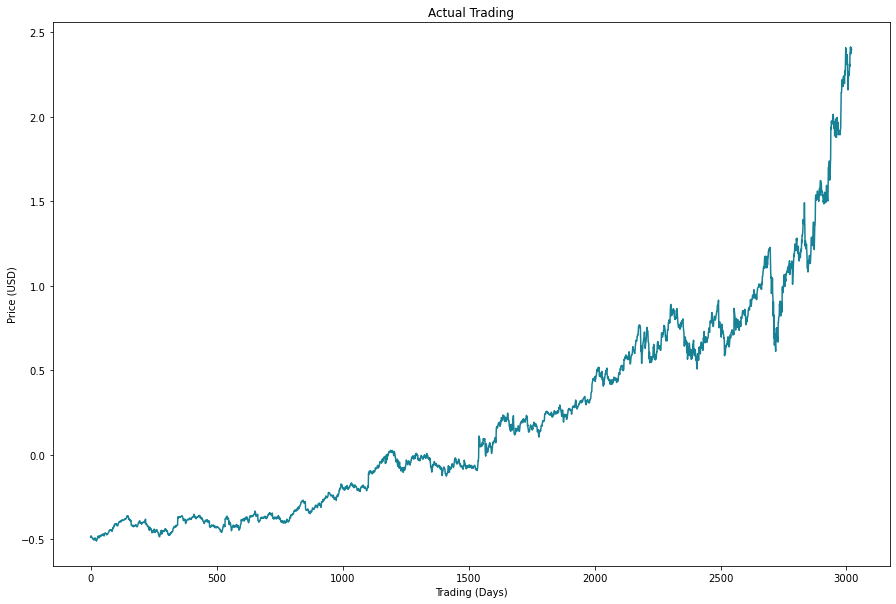

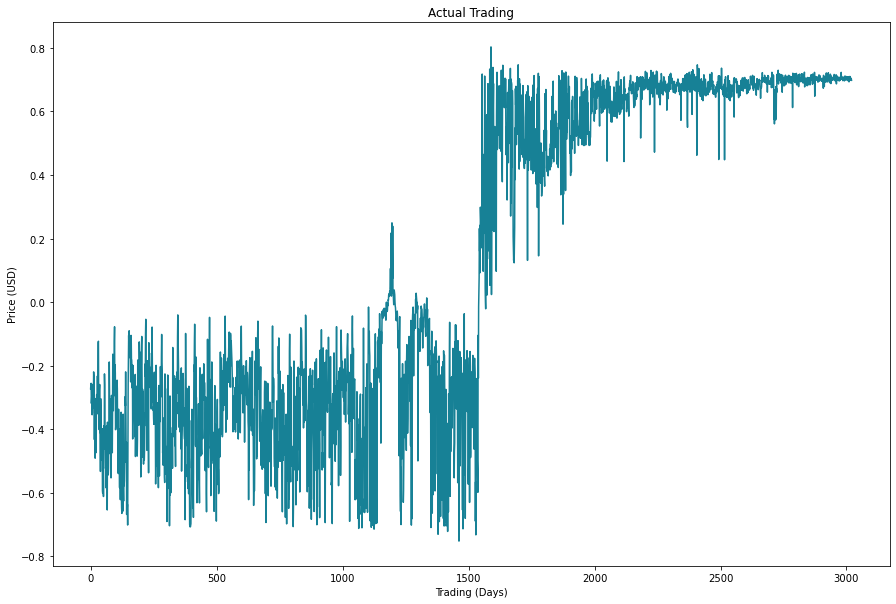

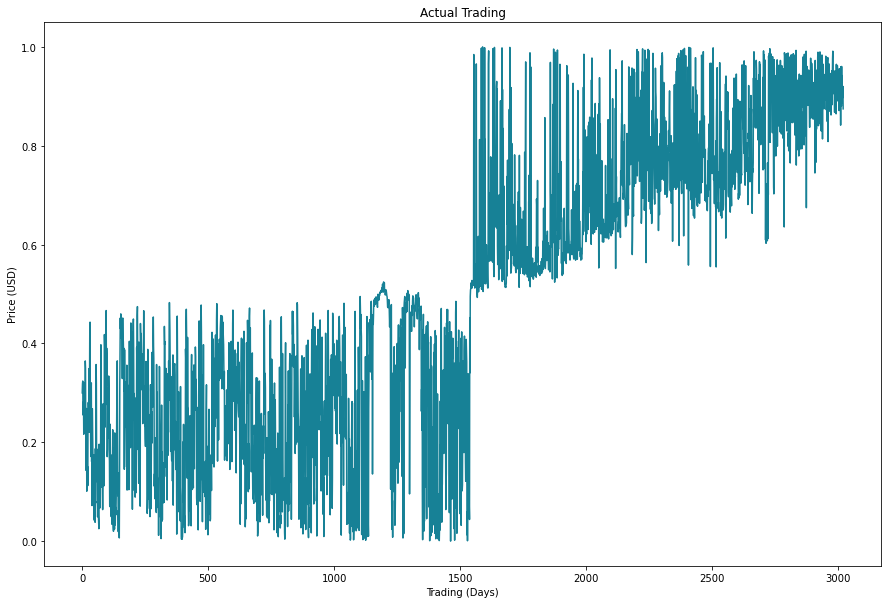

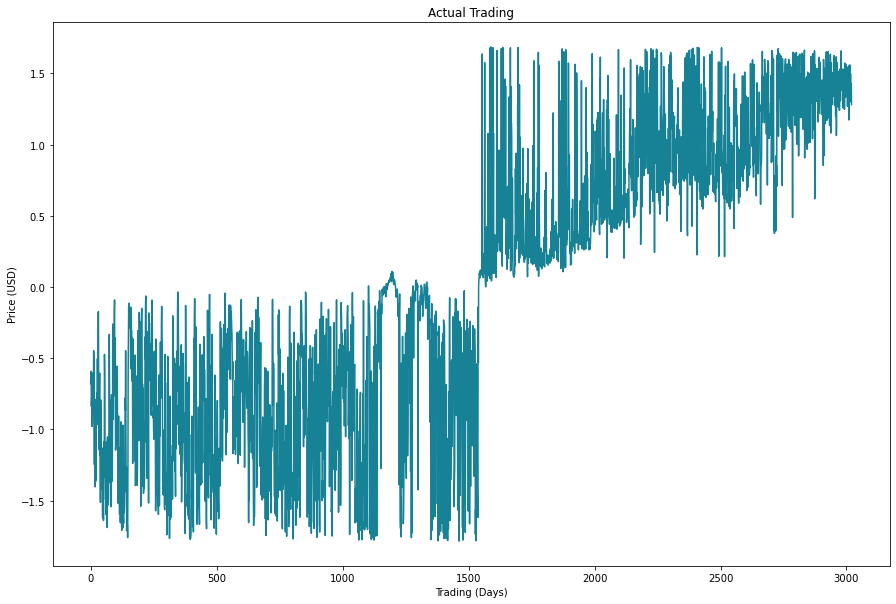

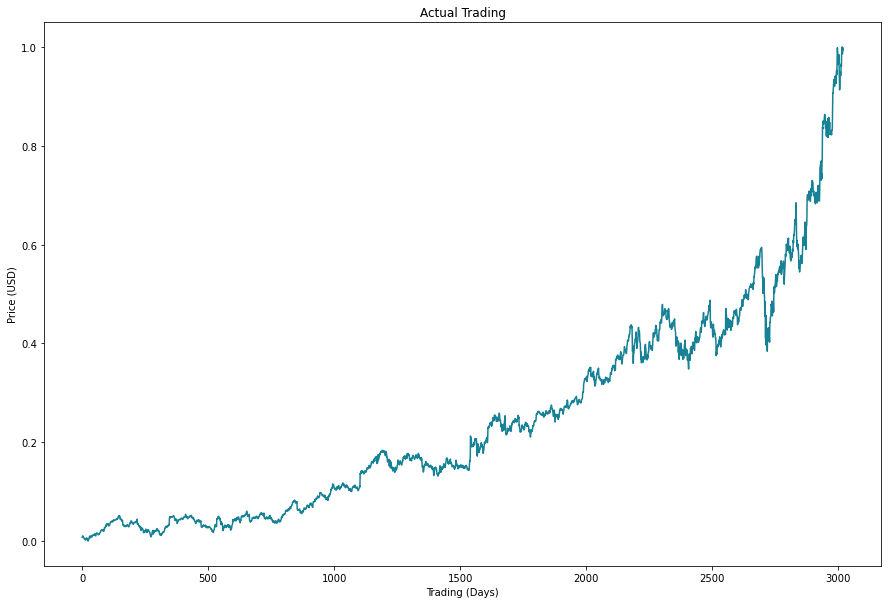

   Item      Open     Close    Volume
0     0  0.005788  0.007802  0.238101
1     1  0.007858  0.009724  0.245205
2     2  0.010033  0.010625  0.248087
3     3  0.008793  0.009388  0.208811
4     4  0.008588  0.008686  0.219350


In [8]:
plots.basic_plot(Stocks1)
plots.basic_plot(Stocks2)
plots.basic_plot(Stocks3)
plots.basic_plot(Stocks4)
plots.basic_plot(Stocks5)
plots.basic_plot(Stocks6)
plots.basic_plot(Stocks7)
plots.basic_plot(stocks)
print(stocks.head())

**Step 5:** Log the normalised data for future resuablilty

In [9]:
stocks.to_csv('google_preprocessed.csv',index= False)

# Check Point #2

This is my second checkpoint. The preprocessed data has been saved to disk.

## Bench Mark Model

### Machine Learning Models

In this section we will check our bench mark model. As is proposed in my proposal my bench mark model is a simple

#### Linear Regression Model 

**Step 1:** Load the preprocessed data

In [10]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

import plots as plts
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('google_preprocessed.csv')
display(stocks.head())

,Item,Open,Close,Volume
0,0,0.005788,0.007802,0.238101
1,1,0.007858,0.009724,0.245205
2,2,0.010033,0.010625,0.248087
3,3,0.008793,0.009388,0.208811
4,4,0.008588,0.008686,0.219350


**Step 2:** Split data into train and test pair

In [11]:
X_train, X_test, y_train, y_test, label_range= sd.train_test_split_linear_regression(stocks)

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)
print(y_test)

x_train (2417, 1)
y_train (2417, 1)
x_test (604, 1)
y_test (604, 1)
[[-2.15471368e-01]
 [-2.19344503e-01]
 [-2.31097880e-01]
 [-2.42278782e-01]
 [-2.13244141e-01]
 [-2.09827306e-01]
 [-2.01839621e-01]
 [-1.94361847e-01]
 [-2.19174496e-01]
 [-2.14657477e-01]
 [-2.16151176e-01]
 [-2.00864677e-01]
 [-2.19568121e-01]
 [-2.28029792e-01]
 [-2.02590947e-01]
 [-1.78162970e-01]
 [-1.83189899e-01]
 [-1.63466744e-01]
 [-1.51668709e-01]
 [-1.79182681e-01]
 [-1.93959379e-01]
 [-1.97224115e-01]
 [-1.97268882e-01]
 [-1.73690609e-01]
 [-1.74772885e-01]
 [-1.73422224e-01]
 [-1.80595908e-01]
 [-1.76204019e-01]
 [-1.80461715e-01]
 [-1.95515751e-01]
 [-1.83529803e-01]
 [-1.84397414e-01]
 [-1.79272106e-01]
 [-1.78449153e-01]
 [-1.74987550e-01]
 [-1.56141070e-01]
 [-1.50049662e-01]
 [-1.37321341e-01]
 [-1.41051329e-01]
 [-1.54074787e-01]
 [-1.54951461e-01]
 [-1.25040256e-01]
 [-1.09440714e-01]
 [-1.09333381e-01]
 [-1.16283338e-01]
 [-1.17258392e-01]
 [-1.17437242e-01]
 [-1.04386924e-01]
 [-8.19177881e-02]
 

**Step 3:** Train a Linear regressor model on training set and get prediction

In [12]:
model = LinearRegressionModel.build_model(X_train,y_train)

**Step 4:** Get prediction on test set

In [13]:
predictions = LinearRegressionModel.price_prediction(model,X_test, label_range)

**Step 5:** Plot the predicted values against actual

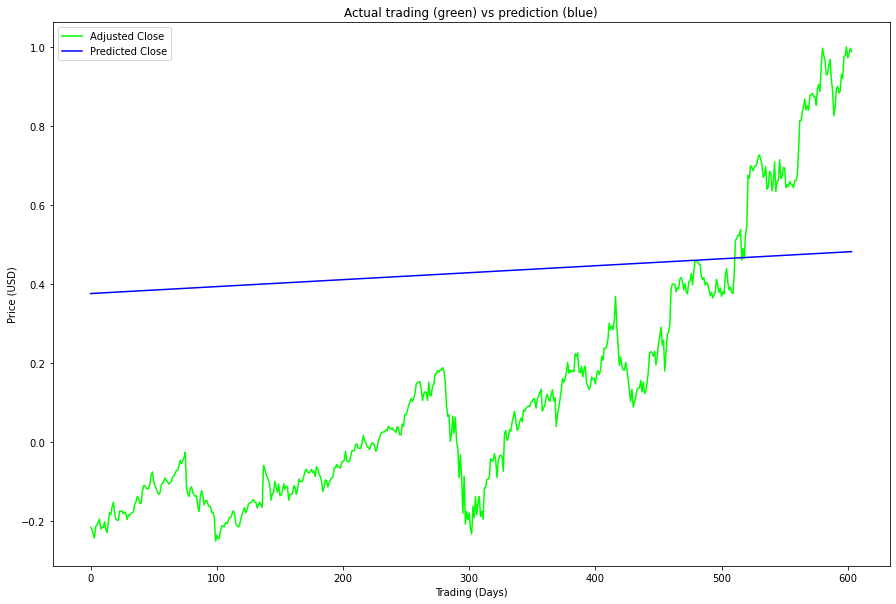

In [14]:
plts.prediction_plot(y_test,predictions)

**Step 6:** measure accuracy of the prediction

In [15]:
trainScore = mean_squared_error(X_train, y_train)
print('Train Score: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = mean_squared_error(predictions, y_test)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.2760 MSE (0.5253 RMSE)
Test Score: 0.16889645 MSE (0.41097013 RMSE)


### SVM Model

0.7044124197522375


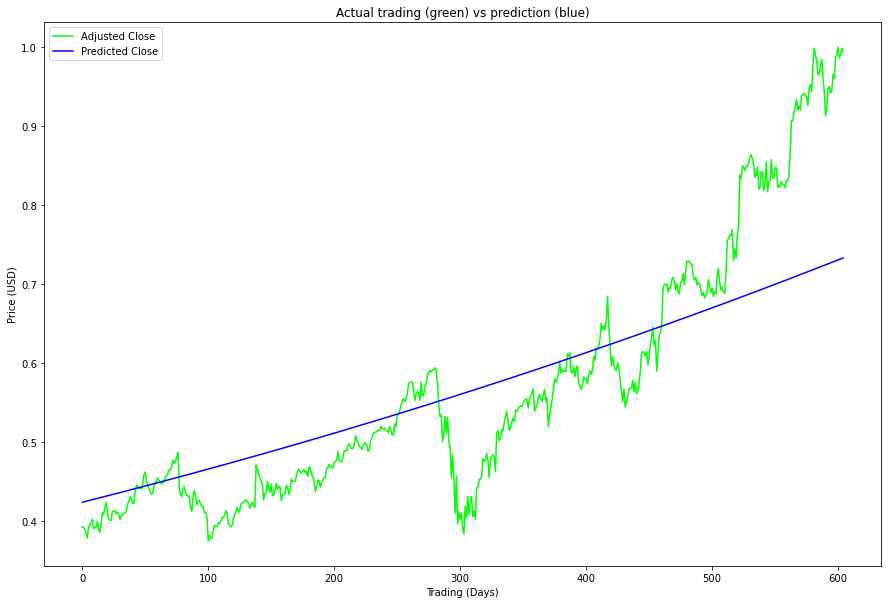

In [16]:
#svm model
import stock_data as sd
from sklearn import svm

X_train, X_test, y_train, y_test = sd.train_test_split_ml(stocks,0.80)
clf = svm.SVR(kernel='poly')
X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)

clf.fit(X_train, y_train) #train
accuracy = clf.score(X_test, y_test) #test Accuracy squared error for linreg
prtt = clf.predict(X_test)

print(accuracy)
plots.lstm_prediction_plot(y_test,prtt)

### KNN Model

0.1985488277200721


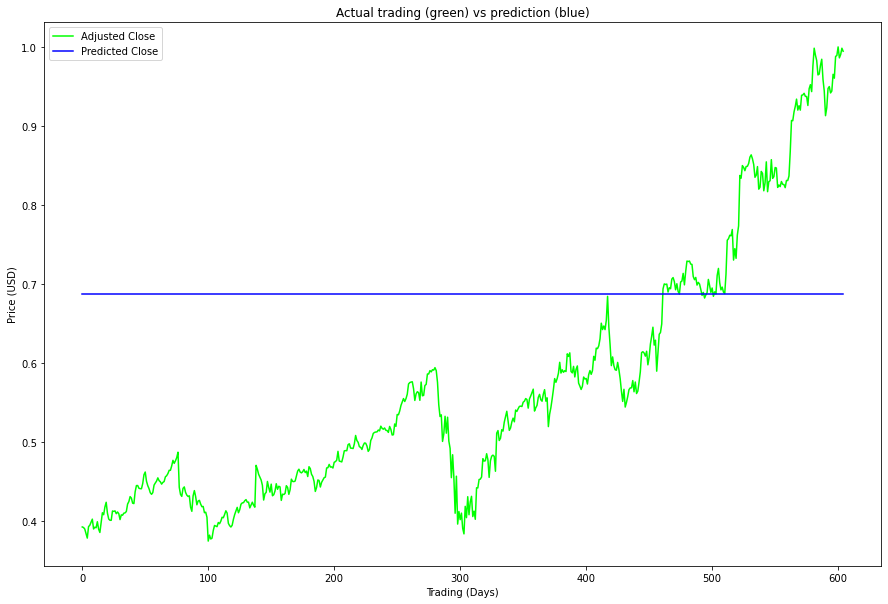

In [17]:
#KNN Model
import stock_data as sd
import knnModel

X_train, X_test, y_train, y_test = sd.train_test_split_ml(stocks,0.80)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

model = knnModel.build_model()

#fit the model and make predictions
model.fit(X_train,y_train)
preds = model.predict(X_test)

preds, _ = sd.scale_range(
        preds, input_range=[-1.0, 1.0], target_range=label_range)

rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
print(rms)
plots.lstm_prediction_plot(y_test,preds)

## Deep Learning Models :-

### DNN Model

In [18]:
#DNN Model
import stock_data as sd
import dnnModel

trainX, trainY, testX, testY = sd.train_test_split_dnn(stocks,0.80)

model=dnnModel.build_model()
past=model.fit(trainX,trainY, epochs=25, batch_size=30, verbose=1, validation_data=(testX,testY),shuffle=False)

train_score = model.evaluate(trainX, trainY, verbose=0)

Epoch 1/25
80/80 [==============================] - 2s 11ms/step - loss: 2.0105e-04 - mse: 2.0105e-04 - mae: 0.0116 - val_loss: 0.0065 - val_mse: 0.0065 - val_mae: 0.0704
Epoch 2/25
80/80 [==============================] - 0s 1ms/step - loss: 3.3332e-04 - mse: 3.3332e-04 - mae: 0.0160 - val_loss: 0.0049 - val_mse: 0.0049 - val_mae: 0.0567
Epoch 3/25
80/80 [==============================] - 0s 2ms/step - loss: 6.1247e-04 - mse: 6.1247e-04 - mae: 0.0203 - val_loss: 0.0059 - val_mse: 0.0059 - val_mae: 0.0622
Epoch 4/25
80/80 [==============================] - 0s 2ms/step - loss: 3.4297e-04 - mse: 3.4297e-04 - mae: 0.0153 - val_loss: 0.0021 - val_mse: 0.0021 - val_mae: 0.0357
Epoch 5/25
80/80 [==============================] - 0s 1ms/step - loss: 2.1576e-04 - mse: 2.1576e-04 - mae: 0.0124 - val_loss: 0.0024 - val_mse: 0.0024 - val_mae: 0.0381
Epoch 6/25
80/80 [==============================] - 0s 2ms/step - loss: 2.2767e-04 - mse: 2.2767e-04 - mae: 0.0125 - val_loss: 0.0022 - val_mse: 0.00

#### DNN Model Loss Plot

Train Root Mean Squared Error(RMSE): 0.02; Train Mean Absolute Error(MAE) : 0.02 
Test Root Mean Squared Error(RMSE): 0.04; Test Mean Absolute Error(MAE) : 0.03 


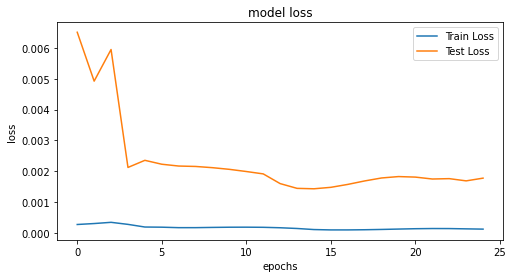

In [19]:
print('Train Root Mean Squared Error(RMSE): %.2f; Train Mean Absolute Error(MAE) : %.2f ' 
% (np.sqrt(train_score[1]), train_score[2]))
test_score = model.evaluate(testX, testY, verbose=0)
print('Test Root Mean Squared Error(RMSE): %.2f; Test Mean Absolute Error(MAE) : %.2f ' 
% (np.sqrt(test_score[1]), test_score[2]))
dnnModel.model_loss_plot(past)

#### DNN Model Prediction Plot

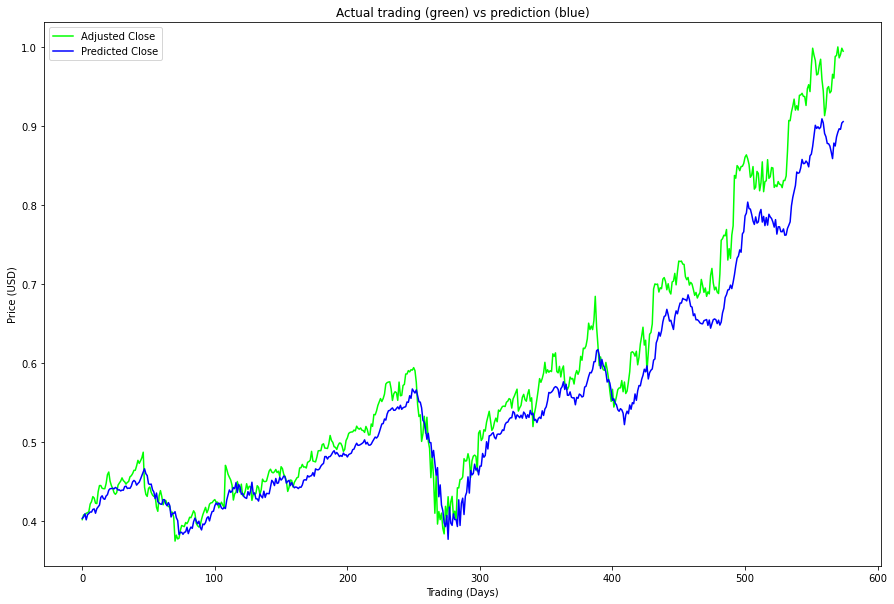

In [20]:
plots.lstm_prediction_plot(testY, model.predict(testX))

### RNN Model

In [21]:
#RNN Model
import stock_data as sd
from sklearn.metrics import mean_absolute_error
import rnnModel

trainX, trainY, testX, testY = sd.train_test_split_rnn(stocks,0.80)

# reshape input to be [samples, window size, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model=rnnModel.build_model()
past=model.fit(trainX,trainY, epochs=25, batch_size=30, verbose=1, validation_data=(testX,testY),shuffle=False)

train_predict = model.predict(trainX)
test_predict = model.predict(testX)

Epoch 1/25
81/81 [==============================] - 1s 4ms/step - loss: 2.6009e-04 - mse: 2.6009e-04 - mae: 0.0131 - val_loss: 0.0094 - val_mse: 0.0094 - val_mae: 0.0833
Epoch 2/25
81/81 [==============================] - 0s 2ms/step - loss: 4.5178e-04 - mse: 4.5178e-04 - mae: 0.0179 - val_loss: 0.0068 - val_mse: 0.0068 - val_mae: 0.0691
Epoch 3/25
81/81 [==============================] - 0s 3ms/step - loss: 2.5706e-04 - mse: 2.5706e-04 - mae: 0.0132 - val_loss: 0.0050 - val_mse: 0.0050 - val_mae: 0.0585
Epoch 4/25
81/81 [==============================] - 0s 2ms/step - loss: 1.2887e-04 - mse: 1.2887e-04 - mae: 0.0091 - val_loss: 0.0043 - val_mse: 0.0043 - val_mae: 0.0542
Epoch 5/25
81/81 [==============================] - 0s 3ms/step - loss: 9.5575e-05 - mse: 9.5575e-05 - mae: 0.0074 - val_loss: 0.0042 - val_mse: 0.0042 - val_mae: 0.0534
Epoch 6/25
81/81 [==============================] - 0s 2ms/step - loss: 9.2149e-05 - mse: 9.2149e-05 - mae: 0.0074 - val_loss: 0.0042 - val_mse: 0.004

#### RNN Model Loss Plot

Train Root Mean Squared Error(RMSE): 0.03; Train Mean Absolute Error(MAE) : 0.03 
Test Root Mean Squared Error(RMSE): 0.07; Test Mean Absolute Error(MAE) : 0.06 


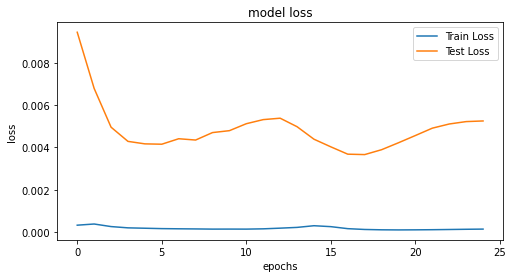

In [22]:
print('Train Root Mean Squared Error(RMSE): %.2f; Train Mean Absolute Error(MAE) : %.2f '
      % (np.sqrt(mean_squared_error(trainY, train_predict[:,0])), mean_absolute_error(trainY, train_predict[:,0])))
print('Test Root Mean Squared Error(RMSE): %.2f; Test Mean Absolute Error(MAE) : %.2f ' 
      % (np.sqrt(mean_squared_error(testY, test_predict[:,0])), mean_absolute_error(testY, test_predict[:,0])))
rnnModel.model_loss_plot(past)

testY=testY.flatten()
test_predict=test_predict.flatten()

#### RNN Model Prediction Plot

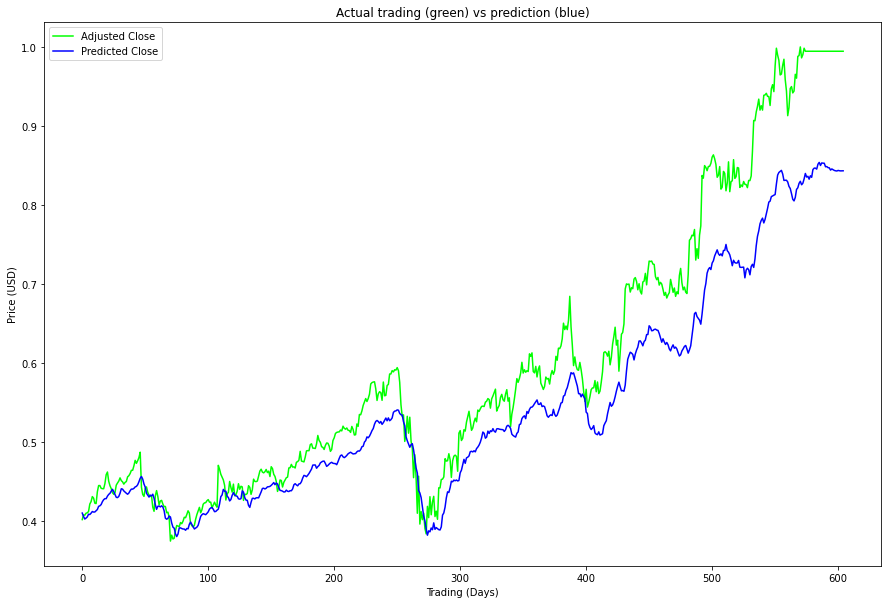

In [23]:
plots.lstm_prediction_plot(testY, test_predict)

# Checkpoint #3


## Long-Sort Term Memory Model

In this section we will use LSTM to train and test on our data set.

### Basic LSTM Model

First lets make a basic LSTM model.

**Step 1 :** import keras libraries for smooth implementaion of lstm 

In [24]:
import math
import pandas as pd
import numpy as np
from IPython.display import display

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

import lstm, time #helper libraries

import plots as plts
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('google_preprocessed.csv')
stocks_data = stocks.drop(['Item'], axis =1)

display(stocks_data.head())

,Open,Close,Volume
0,0.005788,0.007802,0.238101
1,0.007858,0.009724,0.245205
2,0.010033,0.010625,0.248087
3,0.008793,0.009388,0.208811
4,0.008588,0.008686,0.219350


**Step 2 :** Split train and test data sets and Unroll train and test data for lstm model

In [25]:
X_train, X_test,y_train, y_test = sd.train_test_split_lstm(stocks_data, 5)

unroll_length = 50
X_train = sd.unroll(X_train, unroll_length)
X_test = sd.unroll(X_test, unroll_length)
y_train = y_train[-X_train.shape[0]:]
y_test = y_test[-X_test.shape[0]:]

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (2465, 50, 3)
y_train (2465,)
x_test (446, 50, 3)
y_test (446,)


**Step 3 :** Build a basic Long-Short Term Memory model

In [26]:
# build basic lstm model
model = lstm.build_basic_model(input_dim = X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.004899263381958008


**Step 4:** Train the model

In [ ]:
model.fit(
    X_train,
    y_train,
    batch_size=1,
    epochs=1,
    validation_split=0.05)

1290/2341 [===============>..............] - ETA: 15s - loss: 8.4247e-04

**Step 5:** make prediction using test data

In [ ]:
predictions = model.predict(X_test)

**Step 6:** Plot the results

In [ ]:
#plts.lstm_prediction_plot(y_test,predictions)
plts.lstm_prediction_plot(predictions,y_test)

** Step 7:** Get the test score.

In [ ]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Improved LSTM Model
*Step 1: * Build an improved LSTM model

In [ ]:
# Set up hyperparameters
batch_size = 100
epochs = 5

# build improved lstm model
model = lstm.build_improved_model( X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

start = time.time()
#final_model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

In [ ]:
model.fit(X_train, 
          y_train, 
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.05
         )

In [ ]:
# Generate predictions 
predictions = model.predict(X_test, batch_size=batch_size)

In [ ]:
plts.lstm_prediction_plot(y_test,predictions)

In [ ]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

In [ ]:
range = [np.amin(stocks_data['Close']), np.amax(stocks_data['Close'])]

#Calculate the stock price delta in $

true_delta = testScore*(range[1]-range[0])
print('Delta Price: %.6f - RMSE * Adjusted Close Range' % true_delta)    

In [34]:
# import data_preprocess as dpp

# data = pd.read_csv('googl.csv')

# stocks = dpp.delete_data(data)

# stocks = dpp.normalize_data(stocks)

# stocks = stocks.drop(['Item'], axis = 1)
# #Print the dataframe head and tail
# print(stocks.head())

# X = stocks[:].as_matrix()
# Y = stocks[:]['Close'].as_matrix()

# X = sd.unroll(X,1)
# Y = Y[-X.shape[0]:]

# print(X.shape)
# print(Y.shape)

# # Generate predictions 
# predictions = model.predict(X)

# #get the test score
# testScore = model.evaluate(X, Y, verbose=0)
# print('Test Score: %.4f MSE (%.4f RMSE)' % (testScore, math.sqrt(testScore)))